In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

# Análise dos dados de treino do Motor1

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #importando o seaborn
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
import plotly.express as px

from scipy.stats import ks_2samp

In [3]:
def add_rul(g):
    g['RUL'] = max(g['cycle']) - g['cycle']
    return g

cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

In [4]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21"]

#Lê os dados, adiciona a coluna RUL e remove as colunas cycle, op1, op2 e op3
def load_data (clean=True):
    data = pd.read_csv("../input/nasa-cmaps/CMaps/train_FD001.txt", sep= "\s+", header = None,names=columns )
    data = data.groupby('id').apply(add_rul)
    if clean==True:
        data = data.drop(["cycle","op1","op2","op3"], axis=1)
    return data  

In [5]:
def corr_clean (data):
    for col in columns[5:]:
        if math.isnan(data.corr()['RUL'][col]):
            data = data.drop([col], axis=1)
    data = data.corr()
    return data

In [6]:
def norm_func(x):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return x_scaled

def new_data_func(train_data,norm=False):
    columns = train_data.columns
    new_data = train_data[["id",'RUL']]
    new_data.loc[:,'sensor']=[columns[1]]*train_data.shape[0]
#     print(train_data[columns[5]].values)
    if norm == True:
        new_data.loc[:, 'sensor_value'] = norm_func(train_data[columns[1]].values.reshape(-1, 1))
        
    else:
        new_data.loc[:,'sensor_value']= train_data[columns[1]]
        
#     print(np.min(new_data['sensor_value']),np.max(new_data['sensor_value']))
    
    
    
    for column in columns[1:-1]:
        temp_data = train_data[["id",'RUL']]
        temp_data.loc[:,'sensor']=[column]*train_data.shape[0];
        if norm == True:
            temp_data.loc[:, 'sensor_value']=norm_func(train_data[column].values.reshape(-1, 1));
        else:
            temp_data.loc[:,'sensor_value']=train_data[column];
            
#         print(np.min(temp_data['sensor_value']),np.max(temp_data['sensor_value']))
        new_data = pd.concat([new_data,temp_data],ignore_index=True)
    
    return new_data

## Apresentação do DataSet

In [7]:
train_data = load_data(clean=False)
train_data.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [8]:
train_data[train_data.columns[:15]].head(4)

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3


In [9]:
train_data[train_data.columns[15:]].head(4)

,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188


In [10]:
train_data.describe()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   op1       20631 non-null  float64
 3   op2       20631 non-null  float64
 4   op3       20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

<AxesSubplot:>

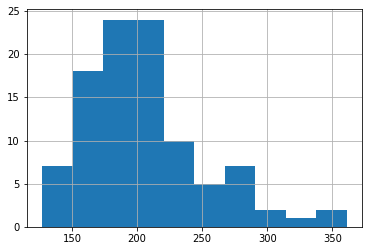

In [12]:
train_data[train_data.cycle==1].RUL.hist()

# KS-test para comparação dos ciclos iniciais e finais de cada motor

In [13]:
# Divide o dataframe em dois, com os 10 primeiros e 10 últimos ciclos
df_inicio = train_data[train_data.cycle<=30]
df_final = train_data[train_data.RUL<=30]

In [14]:
# Lista de sensores
sensor_list = [s for s in df_inicio.columns if 'sensor' in s]

In [15]:
ks_test_pvalue = {}
for sensor in sensor_list:
    data_inicio = df_inicio[sensor]
    data_final = df_final[sensor]
    ks_test_pvalue[sensor] = ks_2samp(data_inicio, data_final).pvalue

In [16]:
df_ks_test_pvalue = pd.DataFrame(ks_test_pvalue, index=['p-value']).T.reset_index()
df_ks_test_pvalue.rename(columns={'index': 'sensor'}, inplace=True)

In [17]:
# Define se cada sensor é estatisticamente equivalente entre a condição inicial e na falha
alpha = 0.05
sensor_equiv = {}
sensor_equiv['Equivalente'] = df_ks_test_pvalue[df_ks_test_pvalue['p-value'] > alpha].sensor.to_list()
sensor_equiv['Nao-equivalente'] = df_ks_test_pvalue[df_ks_test_pvalue['p-value'] <= alpha].sensor.to_list()

In [18]:
sensor_equiv['Equivalente']

['sensor1', 'sensor5', 'sensor10', 'sensor16', 'sensor18', 'sensor19']

In [19]:
sensor_equiv['Nao-equivalente']

['sensor2',
 'sensor3',
 'sensor4',
 'sensor6',
 'sensor7',
 'sensor8',
 'sensor9',
 'sensor11',
 'sensor12',
 'sensor13',
 'sensor14',
 'sensor15',
 'sensor17',
 'sensor20',
 'sensor21']

## Box plot comparando sensores no início e final

In [20]:
# Unificar df inicial e final em um mesmo dataframe
df_inicio['Condicao'] = 'Inicial'
df_final['Condicao'] = 'Falha'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df_compara = pd.concat([df_inicio, df_final])
df_compara.drop(columns=['id', 'cycle', 'op1', 'op2', 'op3', 'RUL'], inplace=True)

In [22]:
df_compara = df_compara.set_index('Condicao').stack().reset_index().rename(columns={'level_1': 'Sensor', 0: 'Valor'})

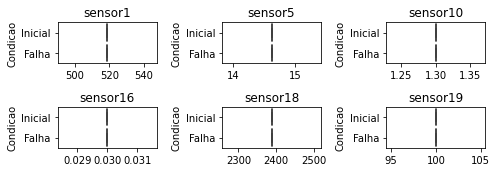

In [23]:
data = sensor_equiv['Equivalente']
nx = 2
ny = 3
f, axes = plt.subplots(nx, ny, figsize=(7,2.5))

for _id, sensor in enumerate(data):
    #plt.figure(figsize=(3,2))
    idx = int(_id/ny)
    idy = (_id % ny)
    g = sns.boxplot(x='Valor', y='Condicao', data=df_compara[df_compara.Sensor==sensor], ax=axes[idx][idy])
    #g.set_xscale("log")
    #g.set_xlim(xmin=2300, xmax=2500)
    axes[idx][idy].set_title(sensor)
    axes[idx][idy].set_xlabel('')
plt.tight_layout()
plt.show()

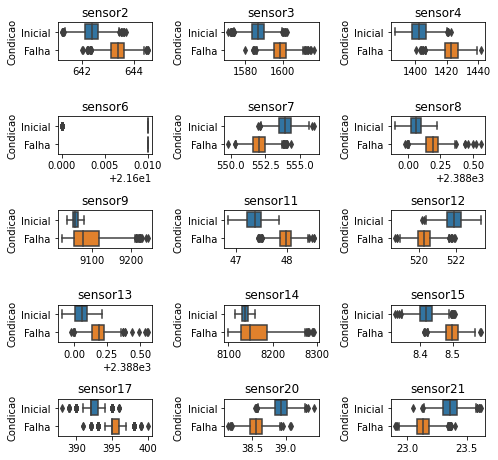

In [24]:
data = sensor_equiv['Nao-equivalente']
nx = 5
ny = 3
f, axes = plt.subplots(nx, ny, figsize=(7,6.5))

for _id, sensor in enumerate(data):
    #plt.figure(figsize=(3,2))
    idx = int(_id/ny)
    idy = (_id % ny)
    g = sns.boxplot(x='Valor', y='Condicao', data=df_compara[df_compara.Sensor==sensor], ax=axes[idx][idy])
    #g.set_xscale("log")
    #g.set_xlim(xmin=2300, xmax=2500)
    axes[idx][idy].set_title(sensor)
    axes[idx][idy].set_xlabel('')
plt.tight_layout()
plt.show()

## Teste KS variando a distância X entre os pontos em RUL\~0 vs RUL\~X

Falta fazer para cada id separadamente

In [25]:
offset_step = 2
offset_size = np.arange(0,190,offset_step)
N_samples = 10

In [26]:
# DataFrame final, logo antes da falha
#df_final = train_data[train_data.RUL<=N_samples]
df_inicio = train_data[train_data.cycle<=N_samples]

# Lista de sensores
sensor_list = [s for s in df_inicio.columns if 'sensor' in s]

In [27]:
ks_test_pvalue = {}
for delta in offset_size:
    #df_inicio = train_data[(train_data.RUL<=N_samples+delta) & (train_data.RUL>N_samples)]
    df_final = train_data[(train_data.RUL<=N_samples+delta) & (train_data.RUL>delta)]
    
    ks_test_pvalue[delta] = {}

    for sensor in sensor_list:
        data_inicio = df_inicio[sensor]
        data_final = df_final[sensor]
        ks_test_pvalue[delta][sensor] = ks_2samp(data_inicio, data_final).pvalue

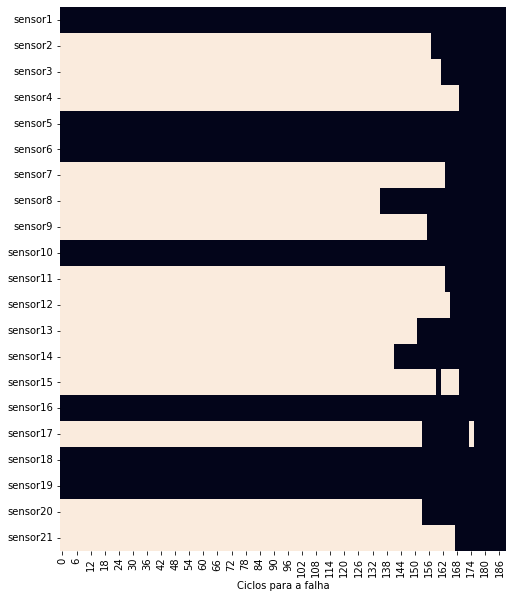

In [28]:
alpha = 0.05
plt.figure(figsize=(8,10))
g = sns.heatmap(pd.DataFrame(ks_test_pvalue)<alpha, cbar=False)
g.set_xlabel('Ciclos para a falha')
plt.show()

<AxesSubplot:>

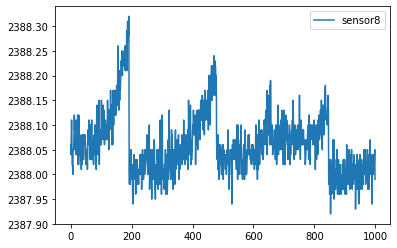

In [29]:
train_data[['sensor8']].head(1000).plot()

<AxesSubplot:>

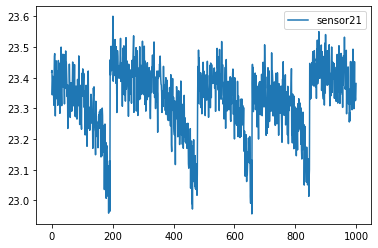

In [30]:
train_data[['sensor21']].head(1000).plot()

In [31]:
# Plotar trajetórias de sensores que 

In [32]:
df_inicio

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20436,100,6,-0.0013,-0.0004,100.0,518.67,642.19,1588.84,1403.20,14.62,...,2388.06,8142.28,8.4120,0.03,392,2388,100.0,38.91,23.5751,194
20437,100,7,-0.0009,-0.0003,100.0,518.67,642.88,1590.24,1397.64,14.62,...,2388.07,8139.49,8.4064,0.03,393,2388,100.0,38.99,23.2404,193
20438,100,8,0.0043,0.0002,100.0,518.67,642.76,1585.19,1405.63,14.62,...,2388.07,8139.02,8.4221,0.03,391,2388,100.0,38.98,23.2470,192
20439,100,9,0.0022,0.0000,100.0,518.67,642.36,1586.99,1405.23,14.62,...,2388.06,8137.87,8.4469,0.03,392,2388,100.0,38.93,23.3107,191


In [33]:
df_inicio

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20436,100,6,-0.0013,-0.0004,100.0,518.67,642.19,1588.84,1403.20,14.62,...,2388.06,8142.28,8.4120,0.03,392,2388,100.0,38.91,23.5751,194
20437,100,7,-0.0009,-0.0003,100.0,518.67,642.88,1590.24,1397.64,14.62,...,2388.07,8139.49,8.4064,0.03,393,2388,100.0,38.99,23.2404,193
20438,100,8,0.0043,0.0002,100.0,518.67,642.76,1585.19,1405.63,14.62,...,2388.07,8139.02,8.4221,0.03,391,2388,100.0,38.98,23.2470,192
20439,100,9,0.0022,0.0000,100.0,518.67,642.36,1586.99,1405.23,14.62,...,2388.06,8137.87,8.4469,0.03,392,2388,100.0,38.93,23.3107,191


In [34]:
df_final

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
280,2,89,0.0017,0.0005,100.0,518.67,641.95,1584.62,1394.07,14.62,...,2388.08,8135.49,8.4143,0.03,393,2388,100.0,39.18,23.4148,198
281,2,90,0.0019,-0.0003,100.0,518.67,642.06,1580.77,1405.34,14.62,...,2388.00,8138.51,8.3922,0.03,390,2388,100.0,38.90,23.4878,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20437,100,7,-0.0009,-0.0003,100.0,518.67,642.88,1590.24,1397.64,14.62,...,2388.07,8139.49,8.4064,0.03,393,2388,100.0,38.99,23.2404,193
20438,100,8,0.0043,0.0002,100.0,518.67,642.76,1585.19,1405.63,14.62,...,2388.07,8139.02,8.4221,0.03,391,2388,100.0,38.98,23.2470,192
20439,100,9,0.0022,0.0000,100.0,518.67,642.36,1586.99,1405.23,14.62,...,2388.06,8137.87,8.4469,0.03,392,2388,100.0,38.93,23.3107,191
20440,100,10,0.0050,-0.0002,100.0,518.67,642.40,1589.51,1408.18,14.62,...,2388.04,8143.77,8.4290,0.03,392,2388,100.0,39.06,23.4296,190


# Notebook antigo

In [35]:
#Normalizando os dados
new_data = new_data_func(train_data, norm=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

### Media, Mediana, Desvio e Distribuição

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of ticklabels (21).

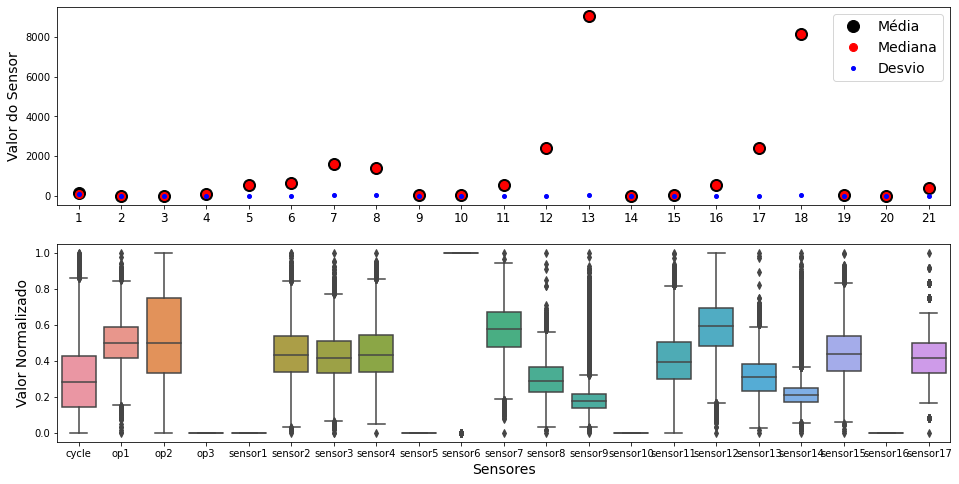

In [36]:
fig, axes = plt.subplots(2, 1,figsize = (16,8));
axes[0].plot(train_data[train_data.columns[1:-1].to_list()].mean(), "ok", linewidth= 3, markersize=12);
axes[0].plot(train_data[train_data.columns[1:-1].to_list()].median(), "or", linewidth= 3, markersize=8);
axes[0].plot(train_data[train_data.columns[1:-1].to_list()].std(), "ob", linewidth= 3, markersize=4);

axes[0].legend(["Média", "Mediana", "Desvio"], loc="upper right", fontsize=14);
axes[0].set_xticklabels(labels = range(1,22), fontsize = 12); 
axes[0].set_xlim(-0.5,20.5);
axes[0].set_ylabel("Valor do Sensor", fontsize=14);

sns.boxplot(ax = axes[1], x = "sensor", y = "sensor_value", data = new_data);
axes[1].set_xlim(-0.5,20.5);
axes[1].set_xlabel("Sensores", fontsize=14);
axes[1].set_ylabel("Valor Normalizado", fontsize=14);
axes[1].set_xticklabels(labels = range(1,22), fontsize = 12); 

### Densidade x Valor do Sensor

In [ ]:
novar_col = ["sensor1","sensor5", "sensor6","sensor10","sensor16", "sensor18","sensor19"]
fig, axes = plt.subplots(1, 1,figsize = (16,8));
sns.kdeplot(ax=axes, data=new_data[~new_data.sensor.isin(novar_col)], x="sensor_value", hue="sensor",
            warn_singular=False, fill=True, alpha=0.05, linewidth=2);
axes.set_xlabel("Valor do Sensor", fontsize=14);
axes.set_ylabel("Densidade", fontsize=14);

In [ ]:
train_data.info()

In [ ]:
train_data.std()

## Limpeza dos dados

### Verificando sensores com valores de correlação NaN

In [ ]:
print (train_data.corr()['RUL'])

In [ ]:
data_cor = corr_clean (train_data)

## Analisando a correlação

In [ ]:
plt.figure(figsize=(17,10))
sns.heatmap(data_cor, cmap='RdBu_r', vmin=-1, vmax=1, annot=True)

In [ ]:
data_cor.sort_values(by=['RUL'], ascending=False, key=abs).head(6)

## Cálculo da Média Móvel

In [ ]:
train_data = load_data()
train_data.head()

In [ ]:
sensor2=train_data[train_data['id']==1]['sensor2']
sensor2_avg = sensor2.rolling(10).mean()

plt.plot(sensor2_avg)
plt.plot(sensor2)

In [ ]:
def average_moving(data, step=25):   
    col = data.columns
    data_avg = pd.DataFrame(columns = data.columns)

    for i in range(1, 101):
        temp_data=data[data.id==i]
#         print(temp_data.shape)
        list_avg = []
        list_avg.append(temp_data['id'][step-1:])
        for sensor in col[1:-1]:
            list_avg.append(temp_data[sensor].rolling(step).mean()[step-1:])#
        list_avg.append(temp_data['RUL'][step-1:])#

        data_avg = pd.concat([data_avg,pd.DataFrame(list_avg).transpose()],ignore_index=True)
    return data_avg

In [ ]:
data_avg = average_moving(train_data)

In [ ]:
data_avg.head()

In [ ]:
print (data_avg.corr()['RUL'])

In [ ]:
avg_data_cor = corr_clean (data_avg)

In [ ]:
plt.figure(figsize=(17,10))
sns.heatmap(avg_data_cor, cmap='RdBu_r', vmin=-1, vmax=1, annot=True)

In [ ]:
sensor2=train_data[train_data['id']==1]['sensor2']
sensor2_avg = sensor2.rolling(10).mean()

plt.plot(sensor2_avg)
plt.plot(sensor2)
plt.plot(data_avg[data_avg['id']==1]['sensor2'])

In [ ]:
#print(np.sum(sensor2_avg-train_data[train_data['id']==1]['sensor2'].to_list()))